<h1>Colour changing bar chart with user input<h1> 

We will chart 4 different sample means from 4 different sample gaussian distributions and display a 95% confidence interval of these means. Then the colours of each bar will change depending on some threshold value with respect to the confidence intervals.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

%matplotlib notebook

#create a dataframe of lots of samples from different gaussian distributions
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#calculate the means
df['mean'] = df.mean(axis=1)

#calculate the sample standard deviations
df['SD'] = (df.std(axis=1)/ math.sqrt(3649))

#confidence interval of 95% for the mean is equal to the sample mean +- 1.96 times the sample standard deviation
df['CI'] = df['SD'] * 1.96

df.head()

,0,1,2,3,4,5,6,7,8,9,...,3643,3644,3645,3646,3647,3648,3649,mean,SD,CI
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538,33312.107476,3320.866311,6508.897970
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855,41861.859541,1628.701180,3192.254314
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049,39493.304941,2323.419534,4553.902287
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908,47743.550969,1155.026400,2263.851744


<IPython.core.display.Javascript object>


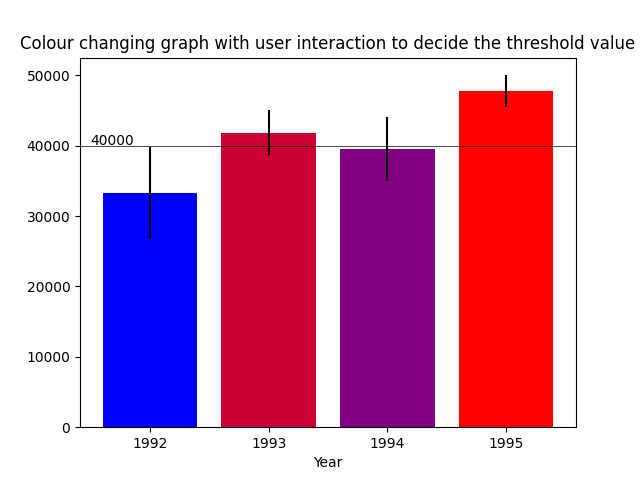

9

In [2]:
#new figure
plt.figure()

def draw_chart(threshold):
    #Create a list for the colours
    colour_list = ['blue']*4
    
    #Change the colours appropriately according to the threshold
    counter = 0
    for mean, interval in zip(df['mean'], df['CI']):
        interval_length = (interval*2)/10
        for i in range(10):
            if (threshold < mean+interval - (interval_length*i)):
                colour_list[counter] = (0+(0.1*(i+1)), 0 , 1-(0.1*(i+1)))
        if threshold < mean-interval:
            colour_list[counter] = (1, 0, 0)
        counter += 1

    #plot the chart
    plt.bar(1992, df.loc[1992,'mean'], color = colour_list[0], yerr=df.loc[1992,'CI'])
    plt.bar(1993, df.loc[1993,'mean'], color = colour_list[1], yerr=df.loc[1993,'CI'])
    plt.bar(1994, df.loc[1994,'mean'], color = colour_list[2], yerr=df.loc[1994,'CI'])
    plt.bar(1995, df.loc[1995,'mean'], color = colour_list[3], yerr=df.loc[1995,'CI'])
    
    #label the x-axis tidily
    plt.xticks([1992, 1993, 1994,1995], ('1992', '1993', '1994', '1995'))
    plt.xlabel('Year')
    
    #Give a title
    plt.title('Colour changing graph with user interaction to decide the threshold value')
    
    #draw the threshold
    plt.axhline(threshold, xmin=0, xmax=1, label='Threshold', linewidth=0.5, color='black')
    
    #label the threshold
    plt.text(1991.5, threshold+ 600, '{}'.format(threshold), ha='left', va='center')

draw_chart(40000)
    
def on_click(event):
    plt.cla()
    draw_chart(event.ydata)

plt.gcf().canvas.mpl_connect('button_press_event', on_click)